# Problem 0
As we have covered in class, we are training a logistic regression model to predict if someone will click on an advertisement. Consider the logistic regression model with 3 features and weights w = [1, −30, 3]. For the dataset with features x1=[20,0,0], y1=1 and x2=[23,1,1], y2=0

In [1]:
# Bullet 1, Compute the probabilities that the logistic regression assigns to these two customers clicking on the advertisement (i.e. P (y = 1))
import numpy as np

w = np.array([1,-30,3])
x1, y1 = np.array([20,0,0]).T, np.array([1]).T
x2, y2 = np.array([23,1,1]).T, np.array([0]).T

s1 = np.dot(w,x1)
s2 = np.dot(w,x2)

def sigmoid(z):
    denom = 1 + np.exp(-z)
    return 1/denom

z1 = sigmoid(s1)
z2 = sigmoid(s2)

print('Probabilities that customers click on the advertisement: y1 -> ', z1, '; y2 -> ', 1-z2)


Probabilities that customers click on the advertisement: y1 ->  0.9999999979388463 ; y2 ->  0.9820137900379085


In [2]:
# Bullet 2, Compute the cross entropy loss of this logistic regression.

def cross_entropy(p, q):
    return -(p*np.log2(q) + (1-p)*np.log2((1-q)))

print('Cross Entropy loss: ', cross_entropy(z1, z2))

Cross Entropy loss:  5.796964962660905


Impurity of the root: 49.76%
Our split: 21.50
Impurity for left leaf (0.00%) and the right leaf (0.00%)


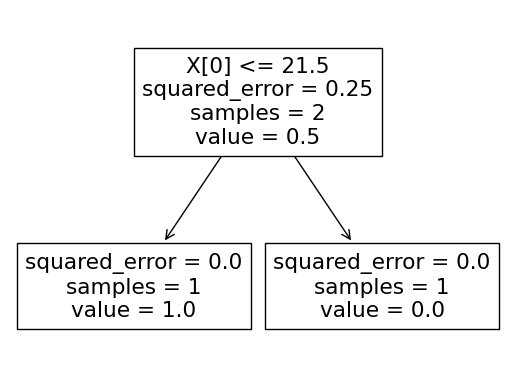

In [3]:
# Bullet 3, Design a decision stump (a decision tree of depth 1) that splits on the first feature. What is the Gini impurity of the root? 
# What is the Gini impurity after the best split that you find?
from sklearn.tree import DecisionTreeRegressor, plot_tree

def gini_impurity(proba : list):
    pr_sq = [np.square(x) for x in proba]
    impurity = 1 - sum(pr_sq)
    return impurity

root = DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=1, ccp_alpha=0)

X = np.vstack((x1[0], x2[0]))
Y = np.vstack((y1, y2))

root.fit(X, Y)
y_pred = root.predict(X)
plot_tree(root, max_depth=1)

# Calculations being done by hand

root_bucket = x1[0] + x2[0]
proba = [x1[0]/root_bucket, x2[0]/root_bucket]
print("Impurity of the root: {:.2%}".format(gini_impurity(proba)))

difference = (x1[0] + x2[0])/2
print('Our split: {:.2f}'.format(difference))

left_leaf_bucket = x1[0]
right_leaf_bucket = x2[0]

print("Impurity for left leaf ({:.2%}) and the right leaf ({:.2%})".format(gini_impurity([left_leaf_bucket/left_leaf_bucket]), gini_impurity([right_leaf_bucket/right_leaf_bucket])))

# Problem 1
In this problem you will explore the dataset CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You will also explore visualizing the solution.

In [4]:
# Problem 1
# Bullet 3, fetch the CIFAR_10_small data 
from sklearn.datasets import fetch_openml
import os.path as osp
import pickle

if not osp.exists('cifar-10-small.pkl'):
    cifar = fetch_openml("CIFAR_10_small")
    with open("cifar-10-small.pkl", "wb") as bunch:
        pickle.dump(cifar, bunch, protocol=pickle.HIGHEST_PROTOCOL)
with open('cifar-10-small.pkl', 'rb') as file:
    cifar = pickle.load(file)

Category Labels 
0. airplane  
1. automobile          
2. bird          
3. cat          
4. deer          
5. dog          
6. frog          
7. horse          
8. ship          
9. truck


Text(0.5, 1.0, 'a0')

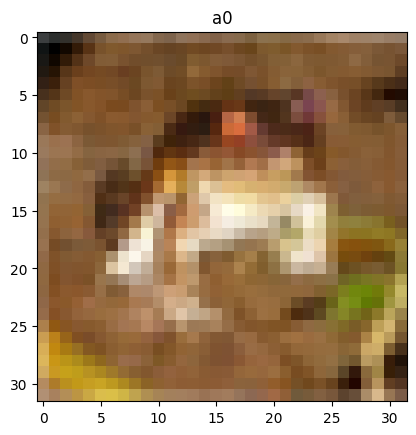

In [5]:
# Bullet 4, Figure out how to display some of the images in this data set, and display a couple. 
#   While not high resolution, these should be recognizable if you are doing it correctly.
import pandas as pd
import matplotlib.pyplot as plt

# Lists the category labels for entries
descr = 'Category Labels \n'+ str(cifar['DESCR']).rsplit(sep=':', maxsplit=2)[2].split('The')[0].strip()
print(descr)

x, y, x_names, y_names = cifar['data'], cifar['target'], cifar['feature_names'], cifar['target_names']

x = np.array(x)

# Reshaping the images so they may be processsed 
# print(x.shape)
images = x.reshape(len(x), 3,32,32)
images = images.transpose(0,2,3,1)
# print(images.shape)

# Displaying a single image
plt.imshow(images[0]/255)
plt.title(x_names[0])


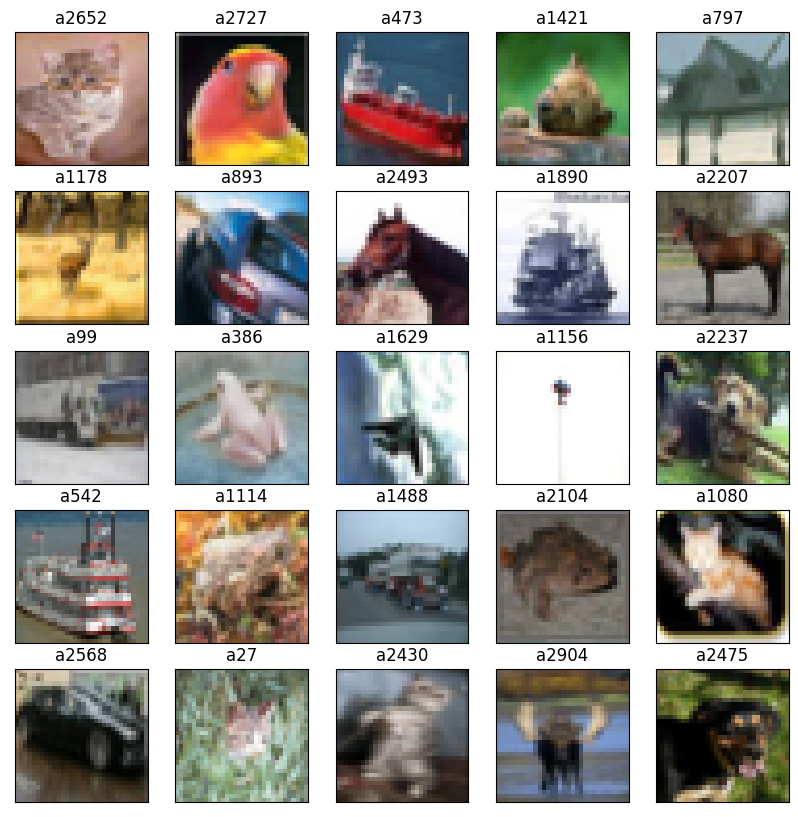

In [6]:
# Displaying multiple images at once
rows, columns = 5, 5
imageId = np.random.randint(0, len(images), rows * columns)
multiImages = images[imageId]
# print(len(x_names))
labels = [x_names[i%3072] for i in imageId]

fig = plt.figure(figsize=(10, 10))
for i in range(1, rows*columns+1,1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(multiImages[i-1]/255)
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(labels[i-1]))
plt.show()

In [7]:
# Bullet 5, There are 20,000 data points. Do a train-test split on 3/4 - 1/4.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75)

In [8]:
# Bullet 6, Run multi-class logistic regression on these using the cross entropy loss.
# Bullet 7, Report your training and test loss.
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Creates constants 
penalties = ['l1', 'l2']
l1_acc, l1_scores = [], []
l2_acc, l2_scores = [], []

In [9]:
# L1 Penalty, Lasso Regression 

cv = 3
lr1 = LogisticRegressionCV(penalty=penalties[0], multi_class="multinomial", solver='saga', cv=cv, max_iter=500, tol=0.1)
lr1.fit(x_train, y_train)
y_predict = lr1.predict(x_test)
l1_acc.append(accuracy_score(y_test, y_predict))
l1_scores.append((lr1.score(x_train, y_train), lr1.score(x_test, y_test)))

print("At cross validation of {}, the accuracy is {:.2%}".format(cv, max(l1_acc)))
print("Training Score: {:.2%}; Test Score: {:.2%}".format(l1_scores[0][0], l1_scores[0][1]))

At cross validation of 3, the accuracy is 38.46%
Training Score: 43.70%; Test Score: 38.46%


In [10]:
# L2 Penalty, Ridge Regression

cv = 3
lr2 = LogisticRegressionCV(penalty=penalties[1], multi_class="multinomial", solver='saga', cv=cv, max_iter=500, tol=0.1)
lr2.fit(x_train, y_train)
y_predict = lr2.predict(x_test)
l2_acc.append(accuracy_score(y_test, y_predict))
l2_scores.append((lr2.score(x_train, y_train), lr2.score(x_test, y_test)))

print("At cross validation of {}, the accuracy is {:.2%}".format(cv, max(l2_acc)))
print("Training Score: {:.2%}; Test Score: {:.2%}".format(l2_scores[0][0], l2_scores[0][1]))

At cross validation of 3, the accuracy is 39.26%
Training Score: 45.07%; Test Score: 39.26%


In [11]:
# Bullet 8, How sparse can you make your solutions without deteriorating your testing error too much?


print('The number of features for our model:', lr1.coef_.shape[1])
# lr1.sparsify()

lr_sparse_acc = []
lr_sparse_scores = []

cv_sparse = 3
lr_sparse = LogisticRegressionCV(Cs=[10, 1, 0.1, 0.01, 0.001], penalty=penalties[0], multi_class="multinomial", solver='saga', cv=cv_sparse, max_iter=500, tol=0.1)

lr_sparse.fit(x_train, y_train)
y_predict = lr_sparse.predict(x_test)
lr_sparse_acc.append(accuracy_score(y_test, y_predict))
lr_sparse_scores.append((lr_sparse.score(x_train, y_train), lr_sparse.score(x_test, y_test)))

print("At cross validation of {}, the accuracy is {}".format(cv, max(l1_acc)))
print("Training Score: {:.2%}; Test Score: {:.2%}".format(lr_sparse_scores[0][0], lr_sparse_scores[0][1]))

The number of features for our model: 3072
At cross validation of 3, the accuracy is 0.3846
Training Score: 44.85%; Test Score: 38.78%


In [ ]:
# Bullet 8, How sparse can you make your solutions without deteriorating your testing error too much?

# CELL IS BROKEN
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import KFold

# print('The number of features for our model:', lr1.coef_.shape[1])

# lr_sparse_acc = []
# lr_sparse_features = []

# kf = KFold(n_splits=3)
# for train, test in kf.split(x_train, y_train):
#     for c in [100, 50, 25, 12.5, 6.25, 3.125, 1]:
#         cv_sparse = LogisticRegression(C=c, penalty=penalties[0], multi_class="multinomial", solver='saga', max_iter=500, tol=0.1)
#         cv_sparse.fit(x_train[train], y_train[train])
#         y_pred_cv = cv_sparse.predict(x_train[test])
#         lr_sparse_features.append(cv_sparse.coef_)
#         lr_sparse_acc.append(accuracy_score(y_test, y_pred_cv))

# Problem 4: Revisiting Logistic Regression and CIFAR-10.
As before, we’ll throw the kitchen sink of classical ML (i.e. pre-deep learning) on CIFAR-10. Keep in mind that CIFAR-10 is a few times larger. <br>
• What is the best accuracy you can get on the test data, by tuning Random Forests? What are the hyperparameters of your best model? <br>
• What is the best accuracy you can get on the test data, by tuning any model including Gradient boosting? What are the hyperparameters of your best model?

In [25]:
# Part 1, What is the best accuracy you can get on the test data, by tuning Random Forests? What are the hyperparameters of your best model?
from sklearn.ensemble import RandomForestRegressor

acc_est = []
acc_depth = []
acc_gamma = []

est =   [10, 20, 100, 200, 300, 400, 500, 600]
depth = [None, 6, 10, 20, 50, 100, 250, 500]
gamma = [1, 2, 10, 20, 100, 200, 1000, 2000]

# Tunning Estimator
print("Tunning the n_est")
for e in [10]:
    print(e)
    rfr = RandomForestRegressor(n_estimators=e, criterion="squared_error", max_depth=None, ccp_alpha=0)
    rfr.fit(x_train, y_train)
    y_pred_rfr = rfr.predict(x_test)
    acc_est.append(rfr.score(y_test, y_pred_rfr))

# print("Tunning the depth")
# # Tunning depth
# for d in depth:
#     print(d)
#     rfc = RandomForestRegressor(n_estimators=100, criterion="squared_error", max_depth=e, ccp_alpha=0)
#     rfc.fit(x_train, y_train)
#     y_pred_rfc = rfc.predict(x_test)
#     acc_depth.append(rfr.score(y_test, y_pred_rfc))

# print("Tunning the gamma")
# # Tunning gamma
# for g in gamma:
#     print(g)
#     rfr = RandomForestRegressor(n_estimators=100, criterion="squared_error", max_depth=None, ccp_alpha=g)
#     rfr.fit(x_train, y_train)
#     y_pred_rfr = rfr.predict(x_test)
#     acc_gamma.append(rfr.score(y_test, y_pred_rfr))

# print(max(acc_est), max(acc_depth), max(acc_gamma))

# rfr = RandomForestRegressor(n_estimators=max(acc_est), criterion="squared_error", max_depth=max(acc_depth), ccp_alpha=max(acc_gamma))
# rfr.fit(x_train, y_train)
# y_pred_rfr = rfr.predict(x_test)
# print("Maximized accuracy score: {:.2%}".format(accuracy_score(y_test, y_pred_rfr)))


Tunning the n_est
10


ValueError: Expected 2D array, got 1D array instead:
array=[6. 1. 1. ... 1. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Part 2, What is the best accuracy you can get on the test data, by tuning any model including Gradient boosting? What are the hyperparameters of your best model?
